In [16]:
import requests
import string
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import log, log2
import random

In [2]:
book = requests.get ("https://gutenberg.org/files/98/98-0.txt")

In [3]:
text = book.text

In [4]:
text[:2000]

'ï»¿The Project Gutenberg eBook of A Tale of Two Cities, by Charles Dickens\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: A Tale of Two Cities\r\n       A Story of the French Revolution\r\n\r\nAuthor: Charles Dickens\r\n\r\nRelease Date: January, 1994 [eBook #98]\r\n[Most recently updated: December 20, 2020]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\nProduced by: Judith Boss and David Widger\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK A TALE OF TWO CITIES ***\r\n\r\n\r\n\r\n\r\nA TALE OF TWO CITIES\r\n\r\nA STORY OF THE FRENCH R

In [5]:
strings2replace = [
                 '\r\n\r\nâ\x80\x9c', # new paragraph
                 'â\x80\x9c',         # open quote
                 'â\x80\x9d',         # close quote
                 '\r\n',              # new line
                 'â\x80\x94',         # hyphen
                 'â\x80\x99',         # single apostrophe
                 'â\x80\x98',         # single quote
                 '_',                 # underscore, used for stressing
                 ]

In [6]:
for st in strings2replace:
    regex_lines = re.compile(st)
    text = regex_lines.sub(' ', text)

In [7]:
for pm in ['.', ',', '!', '?', ':', ';', '(',  ')', '*']: text = text.replace(pm, ' ')

In [8]:
words = text.split()
words = [w.lower() for w in words]

(array([6.0640e+03, 2.5263e+04, 3.3568e+04, 2.5229e+04, 1.4791e+04,
        1.1016e+04, 9.1470e+03, 5.9010e+03, 3.9170e+03, 2.3900e+03,
        1.2730e+03, 7.7500e+02, 4.0800e+02, 1.7200e+02, 8.6000e+01,
        7.6000e+01, 1.3000e+01, 1.2000e+01, 1.4000e+01]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20.]),
 <a list of 19 Patch objects>)

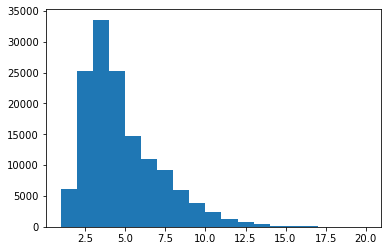

In [9]:
wordsl = [len(w) for w in words]
plt.hist(wordsl, bins=np.linspace(1,20,20))

In [10]:
words_count = dict()
for w in words:
    if w in words_count.keys(): words_count[w] += 1
    else: words_count[w] = 1

In [17]:
random.sample(list(words_count.items()),15)

[('fled', 1),
 ('construction', 1),
 ('much', 181),
 ('chill', 1),
 ('towed', 1),
 ('nervous', 2),
 ('ladies', 5),
 ('perpetuating', 1),
 ('wanderer', 1),
 ('mutilation', 1),
 ('action--not', 1),
 ('he', 1846),
 ('gratitude', 2),
 ('--wasted', 1),
 ('portion', 3)]

<BarContainer object of 50 artists>

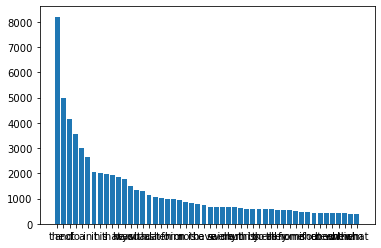

In [18]:
top_words = pd.Series(index = words_count.keys(), data=words_count)
top50 = top_words.sort_values(ascending=False)[:50]
plt.bar(top50.index, top50)

<BarContainer object of 26 artists>

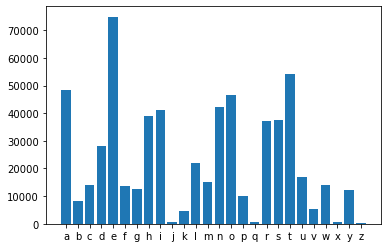

In [19]:
letters = string.ascii_lowercase
lettercounts = pd.Series(index = list(letters), dtype =object)
for l in letters:
    lettercounts[l] = text.lower().count(l)
plt.bar(lettercounts.index, lettercounts)

<BarContainer object of 26 artists>

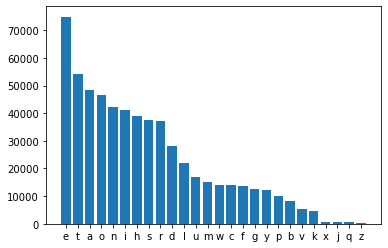

In [20]:
lettercounts_sorted = lettercounts.sort_values(ascending = False)
plt.bar(lettercounts_sorted.index, lettercounts_sorted)

In [21]:
letterprob = lettercounts / sum(lettercounts)
#entropy = -sum(letterprob * np.log2(letterprob + np.finfo(float).eps))
entropy = 0
for p in letterprob: entropy -= p * log2(p + np.finfo(float).eps)
entropy

4.162228055492232

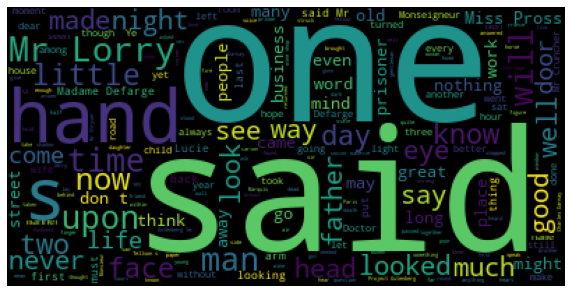

In [22]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

In [54]:
#slow pandas
"""
prob_lead = pd.DataFrame(index = list(letters), columns = list(letters), data = np.zeros((len(letters), len(letters))))
for i, l in enumerate(text):
    if (l in letters) and (text[i-1] in letters):
        prob_lead.loc[text[i-1], l] += 1
"""

In [59]:
prob_lead

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
a,1.0,717.0,1597.0,3085.0,3.0,301.0,927.0,23.0,2330.0,9.0,...,3.0,4922.0,4748.0,6322.0,436.0,1316.0,479.0,41.0,1581.0,44.0
b,552.0,41.0,0.0,7.0,2922.0,0.0,0.0,1.0,177.0,54.0,...,0.0,648.0,154.0,84.0,854.0,2.0,0.0,0.0,607.0,0.0
c,1443.0,0.0,263.0,0.0,2359.0,0.0,0.0,2230.0,721.0,0.0,...,89.0,603.0,15.0,1172.0,446.0,0.0,0.0,0.0,76.0,0.0
d,936.0,0.0,2.0,209.0,2952.0,43.0,120.0,6.0,1393.0,19.0,...,0.0,579.0,672.0,7.0,215.0,59.0,12.0,0.0,303.0,0.0
e,3699.0,67.0,1339.0,6358.0,2208.0,959.0,246.0,136.0,845.0,25.0,...,86.0,10438.0,4612.0,1929.0,255.0,1038.0,435.0,484.0,1077.0,12.0
f,1351.0,0.0,0.0,0.0,1055.0,442.0,0.0,0.0,908.0,0.0,...,0.0,843.0,11.0,454.0,457.0,0.0,0.0,0.0,16.0,0.0
g,656.0,0.0,0.0,1.0,1864.0,1.0,99.0,1795.0,386.0,0.0,...,0.0,706.0,203.0,46.0,286.0,0.0,0.0,0.0,19.0,0.0
h,6591.0,17.0,1.0,12.0,16967.0,36.0,0.0,1.0,5725.0,0.0,...,2.0,454.0,41.0,1225.0,381.0,0.0,13.0,0.0,134.0,0.0
i,361.0,288.0,1525.0,1740.0,1460.0,913.0,1464.0,7.0,0.0,0.0,...,8.0,1428.0,5646.0,5386.0,19.0,724.0,0.0,58.0,0.0,108.0
j,35.0,0.0,0.0,0.0,170.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,116.0,0.0,0.0,0.0,0.0,0.0


In [23]:
prob_lead = np.zeros((len(letters), len(letters)))
for i, l in enumerate(text):
    if (l in letters) and (text[i-1] in letters):
        prob_lead[letters.index(text[i-1]), letters.index(l)] += 1
prob_lead = pd.DataFrame(index = list(letters), columns = list(letters), data = prob_lead)
prob_lead

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
a,1.0,717.0,1597.0,3085.0,3.0,301.0,927.0,23.0,2330.0,9.0,...,3.0,4922.0,4748.0,6322.0,436.0,1316.0,479.0,41.0,1581.0,44.0
b,552.0,41.0,0.0,7.0,2922.0,0.0,0.0,1.0,177.0,54.0,...,0.0,648.0,154.0,84.0,854.0,2.0,0.0,0.0,607.0,0.0
c,1443.0,0.0,263.0,0.0,2359.0,0.0,0.0,2230.0,721.0,0.0,...,89.0,603.0,15.0,1172.0,446.0,0.0,0.0,0.0,76.0,0.0
d,936.0,0.0,2.0,209.0,2952.0,43.0,120.0,6.0,1393.0,19.0,...,0.0,579.0,672.0,7.0,215.0,59.0,12.0,0.0,303.0,0.0
e,3699.0,67.0,1339.0,6358.0,2208.0,959.0,246.0,136.0,845.0,25.0,...,86.0,10438.0,4612.0,1929.0,255.0,1038.0,435.0,484.0,1077.0,12.0
f,1351.0,0.0,0.0,0.0,1055.0,442.0,0.0,0.0,908.0,0.0,...,0.0,843.0,11.0,454.0,457.0,0.0,0.0,0.0,16.0,0.0
g,656.0,0.0,0.0,1.0,1864.0,1.0,99.0,1795.0,386.0,0.0,...,0.0,706.0,203.0,46.0,286.0,0.0,0.0,0.0,19.0,0.0
h,6591.0,17.0,1.0,12.0,16967.0,36.0,0.0,1.0,5725.0,0.0,...,2.0,454.0,41.0,1225.0,381.0,0.0,13.0,0.0,134.0,0.0
i,361.0,288.0,1525.0,1740.0,1460.0,913.0,1464.0,7.0,0.0,0.0,...,8.0,1428.0,5646.0,5386.0,19.0,724.0,0.0,58.0,0.0,108.0
j,35.0,0.0,0.0,0.0,170.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,116.0,0.0,0.0,0.0,0.0,0.0


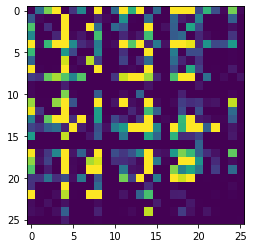

In [24]:
plt.imshow(prob_lead, vmax=2000)

<BarContainer object of 26 artists>

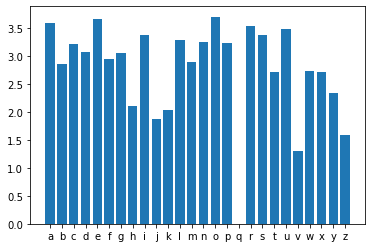

In [33]:
entropy = pd.Series(index = list(letters), data = np.zeros(len(letters)))
for l in prob_lead.index: 
    for p in prob_lead.loc[l] / prob_lead.loc[l].sum(): entropy[l] -= p * log2(p + np.finfo(float).eps)
    #print(l, prob_lead.loc[l] / prob_lead.loc[l].sum())
plt.bar(entropy.index, entropy)